In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


    1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [4]:
df.year.unique(), df.cntry.unique()

(array([6, 7]), array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object))

If the data is normally distributed, we'll use t-test for paired samples. If non-normally distributed, we'll use Wilcoxon signed-rank test.

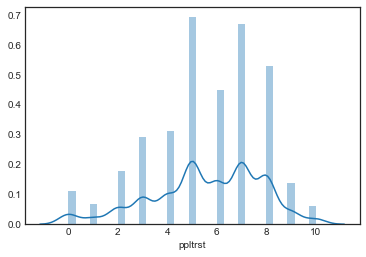

In [51]:
sns.distplot(df.ppltrst.dropna())
plt.show()

That's pretty close to normal -- let's use paired t-test.

In [47]:
for country in df.cntry.unique():
    print('Country {}:'.format(country), '\n',
          '2012 mean, std:',
          df[(df.year==6) & (df.cntry==country)].ppltrst.mean(),
          df[(df.year==6) & (df.cntry==country)].ppltrst.std(), '\n',
          '2014 mean, std:',
          df[(df.year==7) & (df.cntry==country)].ppltrst.mean(),
          df[(df.year==7) & (df.cntry==country)].ppltrst.std(), '\n',
          stats.ttest_rel(df[(df.year==6) & (df.cntry==country)].ppltrst, 
                          df[(df.year==7) & (df.cntry==country)].ppltrst,
                          nan_policy='omit'), '\n'
         )
    

Country CH: 
 2012 mean, std: 5.677878395860285 2.130700741166084 
 2014 mean, std: 5.751617076326003 2.143888312553354 
 Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135) 

Country CZ: 
 2012 mean, std: 4.362519201228879 2.40973840537164 
 2014 mean, std: 4.424657534246576 2.305388884429927 
 Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474) 

Country DE: 
 2012 mean, std: 5.214285714285714 1.5281246137553166 
 2014 mean, std: 5.357142857142857 2.5300393082122064 
 Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805) 

Country ES: 
 2012 mean, std: 5.114591920857379 2.183623363260004 
 2014 mean, std: 4.895127993393889 2.148164939563797 
 Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284) 

Country NO: 
 2012 mean, std: 6.64931506849315 1.7498675856367973 
 2014 mean, std: 6.598630136986301 1.8111825442767264 
 Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177) 

Country SE

Two of our countries have a p-value below 0.05, suggesting a measurable change in trust: Spain (ES, which decreased), and Sweden (SE, which increased). None of the other countries had trust levels change enough to measure.

    2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

First, is the data normally distributed?

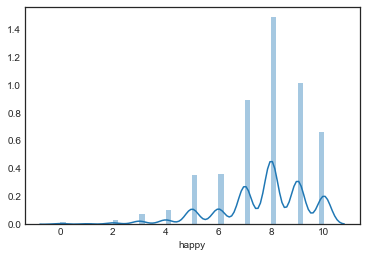

In [52]:
sns.distplot(df.happy.dropna())
plt.show()

Again, pretty close to normal. We can run the same tests.

In [68]:
for country in df.cntry.unique():
    print('Country {}:'.format(country), '\n',
          '2012 mean, std:',
          df[(df.year==6) & (df.cntry==country)].happy.mean(),
          df[(df.year==6) & (df.cntry==country)].happy.std(), '\n',
          '2014 mean, std:',
          df[(df.year==7) & (df.cntry==country)].happy.mean(),
          df[(df.year==7) & (df.cntry==country)].happy.std(), '\n',
          stats.ttest_rel(df[(df.year==6) & (df.cntry==country)].happy, 
                          df[(df.year==7) & (df.cntry==country)].happy,
                          nan_policy='omit'), '\n'
         )

Country CH: 
 2012 mean, std: 8.088311688311688 1.4379198624445235 
 2014 mean, std: 8.116429495472186 1.4057254066572344 
 Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063) 

Country CZ: 
 2012 mean, std: 6.7708978328173375 2.0535818129341483 
 2014 mean, std: 6.914110429447852 1.902859915693832 
 Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451) 

Country DE: 
 2012 mean, std: 7.428571428571429 1.650840611711114 
 2014 mean, std: 7.857142857142857 1.292412345317728 
 Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991) 

Country ES: 
 2012 mean, std: 7.548679867986799 1.9130841347191996 
 2014 mean, std: 7.41996699669967 1.872314878616906 
 Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494) 

Country NO: 
 2012 mean, std: 8.25171939477304 1.4272704838606838 
 2014 mean, std: 7.9151846785225715 1.5810268252030164 
 Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05) 

Coun

Based on these results, the only change in happiness that is statistically significant (p-value=0.00002) is Norway, whose happiness decreased. None of the other countries have measurable change.

    3. Who reported watching more TV in 2012, men or women?

For this one, we won't need to worry about dependent groups. Is it normal?

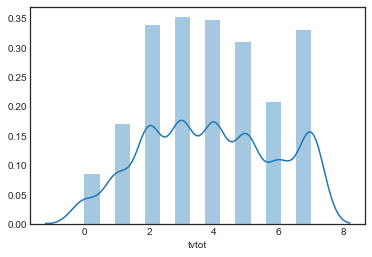

In [53]:
sns.distplot(df[df.year==6].tvtot.dropna())
plt.show()

This is not normal. Let's use Mann-Whitney U-test.

In [61]:
print(' Male TV watching mean, std:',
      df[(df.year==6) & (df.gndr==1)].tvtot.mean(),
      df[(df.year==6) & (df.gndr==1)].tvtot.std(), '\n', 
      'Female TV watching mean, std:',
      df[(df.year==6) & (df.gndr==2)].tvtot.mean(),
      df[(df.year==6) & (df.gndr==2)].tvtot.std(), '\n',
      stats.mannwhitneyu(df[(df.year==6) & (df.gndr==1)].tvtot, 
                         df[(df.year==6) & (df.gndr==2)].tvtot))

 Male TV watching mean, std: 3.901906090190609 1.983689560416923 
 Female TV watching mean, std: 3.944392523364486 2.0494566162335452 
 MannwhitneyuResult(statistic=2277506.5, pvalue=0.22419270231191457)


Men and women did not watch measurably different amounts of TV in 2012.

    4. Who was more likely to believe people were fair in 2012, people with a partner or people living alone?

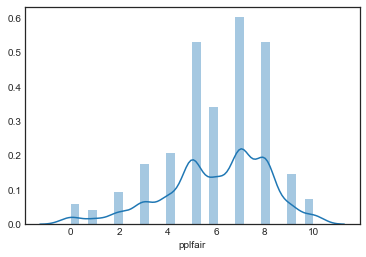

In [62]:
sns.distplot(df[df.year==6].pplfair.dropna())
plt.show()

That's fairly normal -- let's use a t-test.

In [65]:
print(' With Partner fairness mean, std:',
      df[(df.year==6) & (df.partner==1)].pplfair.mean(),
      df[(df.year==6) & (df.partner==1)].pplfair.std(), '\n', 
      'Without Partner fairness mean, std:',
      df[(df.year==6) & (df.partner==2)].pplfair.mean(),
      df[(df.year==6) & (df.partner==2)].pplfair.std(), '\n',
      stats.ttest_ind(df[(df.year==6) & (df.partner==1)].pplfair, 
                      df[(df.year==6) & (df.partner==2)].pplfair,
                      nan_policy='omit'))

 With Partner fairness mean, std: 6.080736012016523 2.1169454907720704 
 Without Partner fairness mean, std: 5.856965174129353 2.162229079547118 
 Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


With a p-value of 0.0009, people with a partner are more likely to think people are fair to them in 2012.

    5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
    
If the distribution is normal, let's use ANOVA.

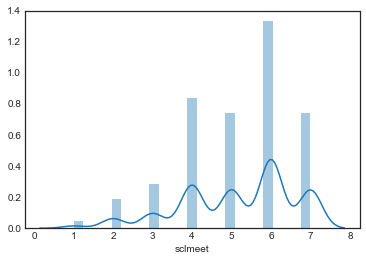

In [67]:
sns.distplot(df[df.year==7].sclmeet.dropna())
plt.show()

Hmm, that is not normal. Let's use Kruskal-Wallis instead.

In [77]:
for country in df.cntry.unique():
    print('Country {}:'.format(country), '\n',
          'Country mean, std:',
          df[(df.year==7) & (df.cntry==country)].sclmeet.mean(),
          df[(df.year==7) & (df.cntry==country)].sclmeet.std(), '\n',
          stats.kruskal(df[(df.year==7) & (df.cntry==country)].sclmeet, 
                        df[(df.year==7) & (df.cntry!=country)].sclmeet,
                        nan_policy='omit'), '\n'
         )

Country CH: 
 Country mean, std: 5.160621761658031 1.3084990567528922 
 KruskalResult(statistic=0.4816805029181373, pvalue=0.487662102336462) 

Country CZ: 
 Country mean, std: 4.445801526717557 1.4817059523925264 
 KruskalResult(statistic=186.19226727618965, pvalue=2.1553615412807575e-42) 

Country DE: 
 Country mean, std: 4.428571428571429 0.7559289460184544 
 KruskalResult(statistic=6.138971985642385, pvalue=0.01322341681587758) 

Country ES: 
 Country mean, std: 5.2601156069364166 1.467854898534904 
 KruskalResult(statistic=13.113714968159636, pvalue=0.00029314181299477856) 

Country NO: 
 Country mean, std: 5.3023255813953485 1.347847622841502 
 KruskalResult(statistic=7.4829481965340605, pvalue=0.006228600327190737) 

Country SE: 
 Country mean, std: 5.426211453744493 1.3730980300040347 
 KruskalResult(statistic=42.31851458812402, pvalue=7.755487735563711e-11) 



Comparing each country to all the rest, it appears that all of them except CH are significantly different from the collection of the whole group. This doesn't actually tell us that much -- there could be two clusters of results that are different enough from each other that including them both in the analysis means all the countries will be different from the mean. It does appear that that's what's happening: ES, NO, and SE are fairly high, CZ and DE are low, CZ is near the middle.

    6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

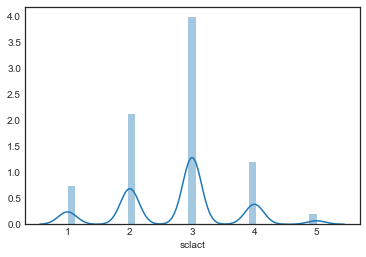

In [78]:
sns.distplot(df[df.year==7].sclact.dropna())
plt.show()

This actually is fairly normally distributed, it just looks funny because of the fit line.

This is a complicated question. So, we're comparing people from each country to people in other countries who are the same age they are. We might get some small sample sizes if we don't bin the ages, so let's make separate groups for each decade. With the normal distribution, we'll be able to use ANOVA.

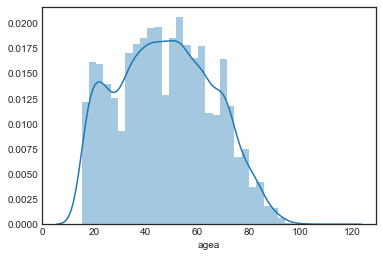

(15.0, 114.0)

In [86]:
sns.distplot(df.agea.dropna())
plt.show()
df.agea.min(), df.agea.max()

In [102]:
for country in df.cntry.unique():
    print('Country {}:'.format(country))
    for age in range(20, 91, 10):
        print('Ages {} - {}'.format(age, age + 9),
              'mean:',
              df[(df.agea>=age) & (df.agea<age+10) & (df.cntry==country)].sclact.dropna().mean(),
              'pvalue:',
              stats.f_oneway(df[(df.agea>=age) & (df.agea<age+10) & (df.cntry==country)].sclact.dropna(),
                             df[(df.agea>=age) & (df.agea<age+10) & (df.cntry!=country)].sclact.dropna())[1])

Country CH:
Ages 20 - 29 mean: 2.7663551401869158 pvalue: 0.20775653733732158
Ages 30 - 39 mean: 2.7170542635658914 pvalue: 0.906505424690014
Ages 40 - 49 mean: 2.784313725490196 pvalue: 0.34694917752335586
Ages 50 - 59 mean: 2.7628458498023716 pvalue: 0.2764287551124943
Ages 60 - 69 mean: 2.6616915422885574 pvalue: 0.0922490370835381
Ages 70 - 79 mean: 2.7045454545454546 pvalue: 0.4957186472714141
Ages 80 - 89 mean: 2.6610169491525424 pvalue: 0.0985533214948272
Ages 90 - 99 mean: 3.142857142857143 pvalue: 0.28806888965177513
Country CZ:
Ages 20 - 29 mean: 2.9743589743589745 pvalue: 0.026025179391651363
Ages 30 - 39 mean: 2.619718309859155 pvalue: 0.08509930882940182
Ages 40 - 49 mean: 2.5823293172690764 pvalue: 0.002003426361333951
Ages 50 - 59 mean: 2.603112840466926 pvalue: 0.04346504813028065
Ages 60 - 69 mean: 2.6324324324324326 pvalue: 0.038234623062239424
Ages 70 - 79 mean: 2.4545454545454546 pvalue: 0.001105178132551279
Ages 80 - 89 mean: 2.533333333333333 pvalue: 0.76728071305

/Users/maxcalabro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))



Ages 30 - 39 mean: 2.8125 pvalue: 0.0616016775103396
Ages 40 - 49 mean: 2.9003322259136213 pvalue: 0.0002769013449650013
Ages 50 - 59 mean: 2.8354430379746836 pvalue: 0.01651652982939557
Ages 60 - 69 mean: 2.9563106796116503 pvalue: 0.0008546672863162846
Ages 70 - 79 mean: 3.0168067226890756 pvalue: 0.0020145042376377696
Ages 80 - 89 mean: 2.7857142857142856 pvalue: 0.03125099678795885
Ages 90 - 99 mean: 3.0 pvalue: 0.4495171050840018
Country SE:
Ages 20 - 29 mean: 2.9163346613545817 pvalue: 0.07918672486634813
Ages 30 - 39 mean: 2.8883720930232557 pvalue: 0.0008289073701688278
Ages 40 - 49 mean: 2.904 pvalue: 0.0009057281713212492
Ages 50 - 59 mean: 2.770609318996416 pvalue: 0.18846133069135426
Ages 60 - 69 mean: 2.925806451612903 pvalue: 0.0002660303708809799
Ages 70 - 79 mean: 2.9452054794520546 pvalue: 0.001008245414566531
Ages 80 - 89 mean: 2.63768115942029 pvalue: 0.1049428160660941
Ages 90 - 99 mean: 3.0 pvalue: 0.3819391910679514


This is a lot to look at (but we were asked to calculate a lot as well). Here's what we see:

Some of the groups that do activities a significantly different amount than their same age group in different countries include:
    
    In CZ and ES, most age groups do fewer activities than their counterparts in other countries.
    In NO and SE, most age groups do more activities than their counterparts in other countries.